# Analysis of the Iris Dataset.
*By Laura Lyons*
***

## **1.0    Introduction**
***
The Iris dataset was compiled by Edgar Anderson and pusblish by Ronald Fisher in 1936 () and is composed of is collection of measurements taken from 3 different types of irises present on the Gaspe Peninsula (Iris flower data set, 2024)

The raw data set is available [on Github](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv). This source data was choosen as:
 - all headings are properly formatted and in lower case
 - all integer varialbles are to one decimal point.
 This will make for an easier analysis.

## **2.0    Methods**
***

#### 2.1    Prerequisites/ Imports

A number of imports were used to help with the data analysis and visualisation.

1. **Pandas**: for for the DataFrame data structure and forstoring, manipulating and working with structured data. It allows us to investigate CSV files, amongst other features.

1. **Numpy**: as it creates efficient data structures for dealing with numerical data in python. Reference Lecture 5. Module Principles of Data Analytics.

1. **Matplotlib.pyplot:** for creating plots.

1. **Seaborn**: matplotlib sub-library for creating attractive data visualisation.

In [19]:
# Data frames
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2.2    Load the Data
The Iris data set was loaded from a URL.

Once the data was loaded, it allowed analyse/ investigate the data to begin.

In [2]:
# Load the Fisher Iris data set.
df=pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

## **3.0 Results**
***

In [3]:
# An overview of the data was retrieved so that we could decifer the type and number of variables present. 
df 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# It would be helpful to know how many variables and also what type of data each of the variables is?
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

From the above data frame, we can see that there are 5 variables of which 4 are numerical and the final variable is an object.

In [12]:
df.describe()
# The max and min of each variable will be helpful for setting axis limits.

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# It would be useful to know how many of each species were analised and also how many male and female penguins were measured within each species.

df ['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Plotting graph for IRIS Dataset Using Seaborn and Matplotlib (2021) *GeeksforGeeks.* Available at https://www.geeksforgeeks.org/plotting-graph-for-iris-dataset-using--and-matplotlib. 

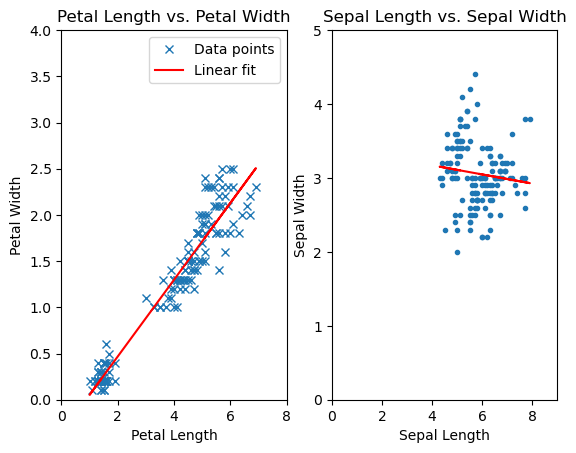

In [7]:

# Extract data
plen = df['petal_length']
pwidth = df['petal_width']
slen = df['sepal_length']
swidth = df['sepal_width']

# Fit a straight line between petal length and petal width
m1, c1 = np.polyfit(plen, pwidth, 1)

# Fit a straight line between sepal length and sepal width
m2, c2 = np.polyfit(slen, swidth, 1)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Scatter plot for petal length vs. petal width
ax1.plot(plen, pwidth, 'x', label='Data points')
ax1.plot(plen, m1 * plen + c1, 'r-', label='Linear fit')
ax1.set_xlabel('Petal Length')
ax1.set_ylabel('Petal Width')
ax1.set_title('Petal Length vs. Petal Width')
ax1.legend()
# Set axes limits.
ax1.set_xlim(0, 8)
ax1.set_ylim(0, 4)

# Scatter plot for sepal length vs. sepal width
ax2.plot(slen, swidth, '.', label='Data points')
ax2.plot(slen, m2 * slen + c2, 'r-', label='Linear fit')
ax2.set_xlabel('Sepal Length')
ax2.set_ylabel('Sepal Width')
ax2.set_title('Sepal Length vs. Sepal Width')

# Set axes limits.
ax2.set_xlim(0, 9)
ax2.set_ylim(0, 5)

plt.show()



In [8]:
# Measure the correlation.
np.corrcoef(plen, pwidth)

array([[1.        , 0.96286543],
       [0.96286543, 1.        ]])

In [9]:
np.corrcoef(slen, swidth)

array([[ 1.        , -0.11756978],
       [-0.11756978,  1.        ]])

In [17]:
# Data analysis
# Calculate summary statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)



Summary Statistics:
count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object


## **0.0    References**
***
'Iris flower data set' (2024) *Wikipedia.* Available at https://en.wikipedia.org/wiki/Iris_flower_data_set (Accessed: 18.03.2024)

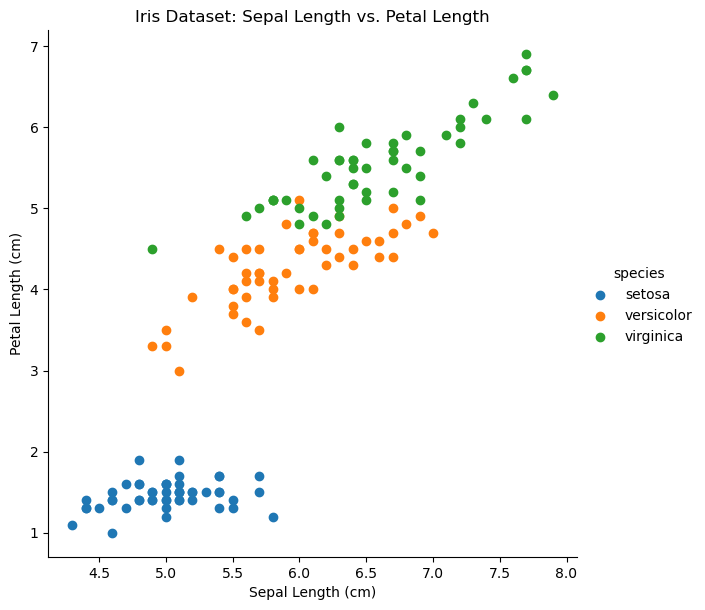

In [14]:
df = sns.load_dataset('iris')

# Create a scatter plot
#sns.set_style('whitegrid')
#m1, c1 = np.polyfit('petal_length', 'petal_width', 1)
#ax1.plot(plen, m1 * plen + c1, 'r-', label='Linear fit')

sns.FacetGrid(df, hue='species', height=6).map(plt.scatter, 'sepal_length', 'petal_length').add_legend()
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Iris Dataset: Sepal Length vs. Petal Length')
plt.show()

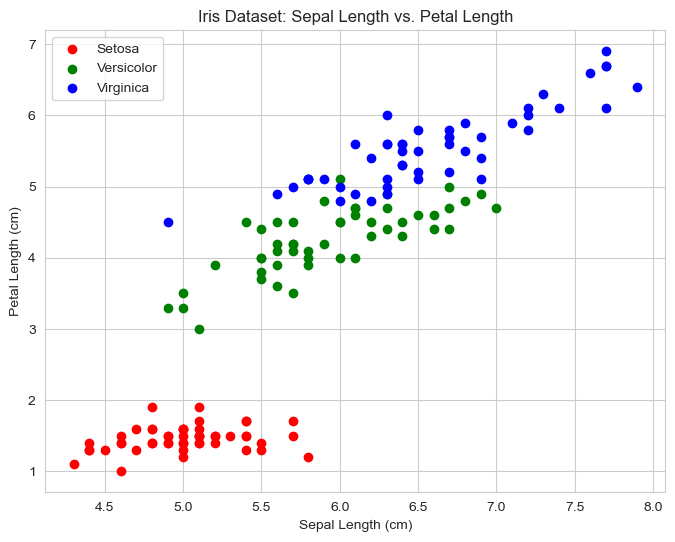

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[df['species'] == 'setosa']['sepal_length'], df[df['species'] == 'setosa']['petal_length'], label='Setosa', color='r')
plt.scatter(df[df['species'] == 'versicolor']['sepal_length'], df[df['species'] == 'versicolor']['petal_length'], label='Versicolor', color='g')
plt.scatter(df[df['species'] == 'virginica']['sepal_length'], df[df['species'] == 'virginica']['petal_length'], label='Virginica', color='b')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Iris Dataset: Sepal Length vs. Petal Length')
plt.legend()
plt.show()

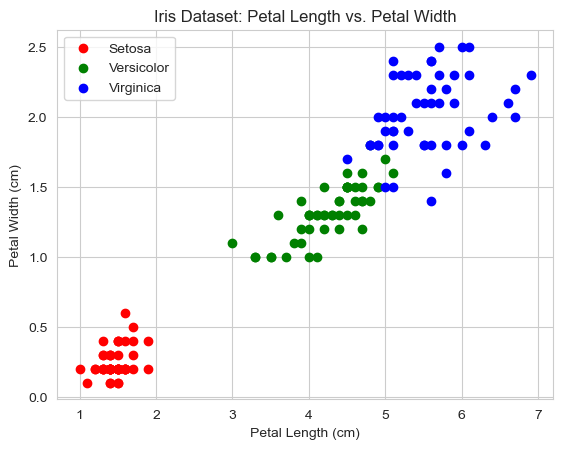

In [ ]:
plen = df['petal_length']
pwidth = df['petal_width']
slen = df['sepal_length']
swidth = df['sepal_width']

plt.scatter(df[df['species'] == 'setosa']['petal_length'], df[df['species'] == 'setosa']['petal_width'], label='Setosa', color='r')
plt.scatter(df[df['species'] == 'versicolor']['petal_length'], df[df['species'] == 'versicolor']['petal_width'], label='Versicolor', color='g')
plt.scatter(df[df['species'] == 'virginica']['petal_length'], df[df['species'] == 'virginica']['petal_width'], label='Virginica', color='b')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset: Petal Length vs. Petal Width')
plt.legend()
plt.show()